# Данный ноутбук посвящен второй лабораторной
Тема - классификация

In [165]:
import numpy as np
import pandas as pd

## Первый этап - обработка датасета

In [166]:
data = pd.read_csv('train.csv')
data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091


### Обработка дублей

In [167]:
print("Before: ", np.shape(data))
data = data.drop_duplicates()
print("After: ", np.shape(data))

Before:  (11017, 36)
After:  (10001, 36)


### Обработка пропусков

In [168]:
print(data.isnull().sum())

ApplicationDate                 1
Age                             1
AnnualIncome                    1
CreditScore                   472
LoanAmount                    472
LoanDuration                    1
MaritalStatus                   1
NumberOfDependents              1
HomeOwnershipStatus             1
MonthlyDebtPayments           472
CreditCardUtilizationRate       1
NumberOfOpenCreditLines         1
NumberOfCreditInquiries         1
DebtToIncomeRatio               1
BankruptcyHistory             472
LoanPurpose                   472
PreviousLoanDefaults            1
PaymentHistory                  1
LengthOfCreditHistory           1
SavingsAccountBalance           1
CheckingAccountBalance        472
TotalAssets                   472
TotalLiabilities                1
MonthlyIncome                   1
UtilityBillsPaymentHistory      1
JobTenure                       1
EmploymentStatus                1
EducationLevel                  1
Experience                      1
NetWorth      

In [169]:
# lets delete one NULL record
data = data.dropna(subset=['ApplicationDate'])
print(data.isnull().sum())

ApplicationDate                 0
Age                             0
AnnualIncome                    0
CreditScore                   471
LoanAmount                    471
LoanDuration                    0
MaritalStatus                   0
NumberOfDependents              0
HomeOwnershipStatus             0
MonthlyDebtPayments           471
CreditCardUtilizationRate       0
NumberOfOpenCreditLines         0
NumberOfCreditInquiries         0
DebtToIncomeRatio               0
BankruptcyHistory             471
LoanPurpose                   471
PreviousLoanDefaults            0
PaymentHistory                  0
LengthOfCreditHistory           0
SavingsAccountBalance           0
CheckingAccountBalance        471
TotalAssets                   471
TotalLiabilities                0
MonthlyIncome                   0
UtilityBillsPaymentHistory      0
JobTenure                       0
EmploymentStatus                0
EducationLevel                  0
Experience                      0
NetWorth      

In [170]:
print(data.dtypes)

ApplicationDate                object
Age                           float64
AnnualIncome                  float64
CreditScore                   float64
LoanAmount                    float64
LoanDuration                  float64
MaritalStatus                  object
NumberOfDependents            float64
HomeOwnershipStatus            object
MonthlyDebtPayments           float64
CreditCardUtilizationRate     float64
NumberOfOpenCreditLines       float64
NumberOfCreditInquiries       float64
DebtToIncomeRatio             float64
BankruptcyHistory             float64
LoanPurpose                    object
PreviousLoanDefaults          float64
PaymentHistory                float64
LengthOfCreditHistory         float64
SavingsAccountBalance         float64
CheckingAccountBalance        float64
TotalAssets                   float64
TotalLiabilities              float64
MonthlyIncome                 float64
UtilityBillsPaymentHistory    float64
JobTenure                     float64
EmploymentSt

In [171]:
# обработаем пропуски с типом object у LoanPurpose
set(data['LoanPurpose'].values)

{'Auto', 'Debt Consolidation', 'Education', 'Home', 'Other', nan}

In [172]:
data['LoanPurpose'] = data['LoanPurpose'].fillna('Other')
set(data['LoanPurpose'].values)

{'Auto', 'Debt Consolidation', 'Education', 'Home', 'Other'}

In [173]:
print(data.isnull().sum())

ApplicationDate                 0
Age                             0
AnnualIncome                    0
CreditScore                   471
LoanAmount                    471
LoanDuration                    0
MaritalStatus                   0
NumberOfDependents              0
HomeOwnershipStatus             0
MonthlyDebtPayments           471
CreditCardUtilizationRate       0
NumberOfOpenCreditLines         0
NumberOfCreditInquiries         0
DebtToIncomeRatio               0
BankruptcyHistory             471
LoanPurpose                     0
PreviousLoanDefaults            0
PaymentHistory                  0
LengthOfCreditHistory           0
SavingsAccountBalance           0
CheckingAccountBalance        471
TotalAssets                   471
TotalLiabilities                0
MonthlyIncome                   0
UtilityBillsPaymentHistory      0
JobTenure                       0
EmploymentStatus                0
EducationLevel                  0
Experience                      0
NetWorth      

In [174]:
# so now we have all NULL values in float columns

# first idea is to replace NULL with mean
# data = data.fillna(data.mean())

# second - with median
# data = data.fillna(data.median())

# and the easiest way - drop all
data = data.dropna()

print(data.isnull().sum())

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
EmploymentStatus              0
EducationLevel                0
Experience                    0
NetWorth                      0
BaseInterestRate              0
Interest

### Обработка выбросов

#### У таргета (RiskScore)

In [175]:
data['RiskScore'].describe()

count    9.529000e+03
mean    -3.458380e+04
std      1.437496e+06
min     -9.999999e+06
25%      3.249476e+01
50%      4.401980e+01
75%      6.526522e+01
max      1.000000e+07
Name: RiskScore, dtype: float64

In [176]:
# trying to save data (~300 records)
# data['RiskScore'] = data['RiskScore'].clip(lower=0) # fix lower value level to replace outlier values
# data['RiskScore'] = data['RiskScore'].clip(upper=100) # fix upper value level to replace outlier values

data = data[data.RiskScore >= 0]
data = data[data.RiskScore <= 100]
data['RiskScore'].describe()

count    9332.000000
mean       48.312511
std        17.243078
min        14.841417
25%        32.693275
50%        44.127496
75%        65.059406
max        97.597249
Name: RiskScore, dtype: float64

#### У LoanAmount

count      9332.000000
mean      29806.541470
std       27314.548547
min        1063.000000
25%       12632.750000
50%       21814.000000
75%       37173.500000
max      418997.000000
Name: LoanAmount, dtype: float64

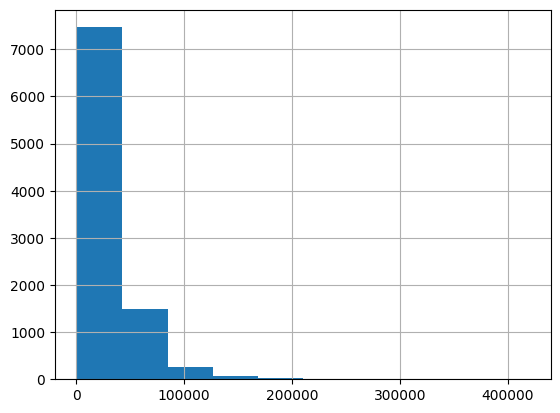

In [177]:
data['LoanAmount'].hist()
data['LoanAmount'].describe()

count      9297.000000
mean      29037.889534
std       24061.741083
min        1063.000000
25%       12611.000000
50%       21715.000000
75%       36903.000000
max      170646.000000
Name: LoanAmount, dtype: float64

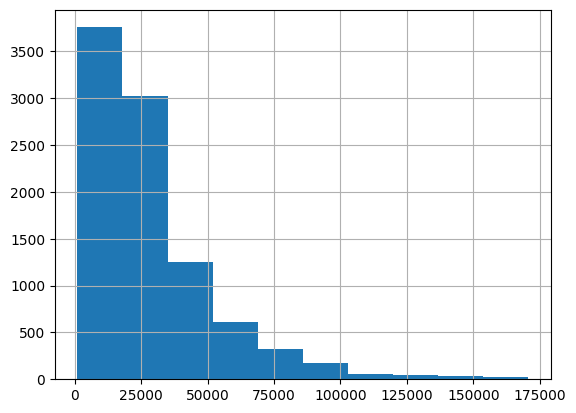

In [178]:
data = data[data.LoanAmount <= 175000]
data['LoanAmount'].hist()
data['LoanAmount'].describe()

#### У MonthlyDebtPayments

count     9297.000000
mean       547.113800
std        503.978644
min         13.000000
25%        234.000000
50%        399.000000
75%        687.000000
max      10879.000000
Name: MonthlyDebtPayments, dtype: float64

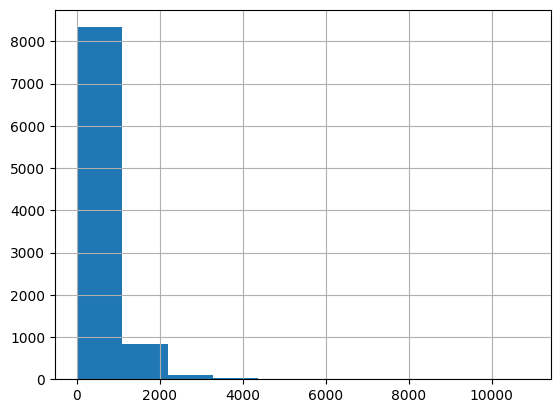

In [179]:
data['MonthlyDebtPayments'].hist()
data['MonthlyDebtPayments'].describe()

count    9252.000000
mean      531.041288
std       440.268685
min        13.000000
25%       233.000000
50%       398.000000
75%       679.000000
max      2999.000000
Name: MonthlyDebtPayments, dtype: float64

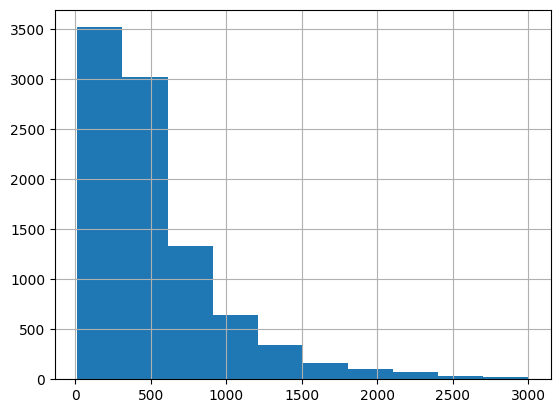

In [180]:
data = data[data.MonthlyDebtPayments <= 3000]
data['MonthlyDebtPayments'].hist()
data['MonthlyDebtPayments'].describe()

#### У SavingsAccountBalance

count      9252.000000
mean       5517.358733
std        8475.416741
min          31.000000
25%        1405.000000
50%        2993.000000
75%        6282.250000
max      222556.000000
Name: SavingsAccountBalance, dtype: float64

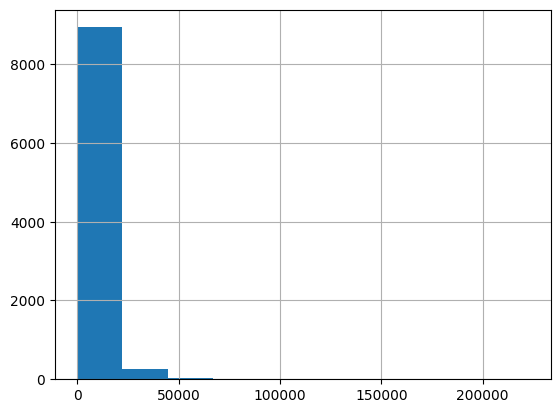

In [181]:
data['SavingsAccountBalance'].hist()
data['SavingsAccountBalance'].describe()

count     9163.000000
mean      4961.815017
std       5749.476336
min         31.000000
25%       1396.500000
50%       2956.000000
75%       6120.000000
max      39460.000000
Name: SavingsAccountBalance, dtype: float64

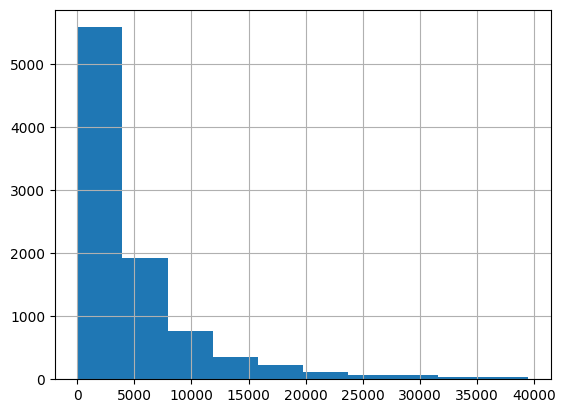

In [182]:
data = data[data.SavingsAccountBalance <= 40000]
data['SavingsAccountBalance'].hist()
data['SavingsAccountBalance'].describe()

#### У CheckingAccountBalance

count      9163.000000
mean       1980.870239
std        3046.160485
min          16.000000
25%         532.000000
50%        1120.000000
75%        2292.500000
max      109245.000000
Name: CheckingAccountBalance, dtype: float64

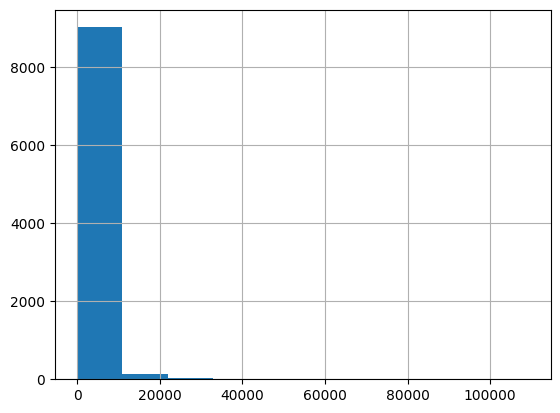

In [183]:
data['CheckingAccountBalance'].hist()
data['CheckingAccountBalance'].describe()

count     9090.000000
mean      1806.890759
std       2050.981527
min         16.000000
25%        528.000000
50%       1109.000000
75%       2246.750000
max      14923.000000
Name: CheckingAccountBalance, dtype: float64

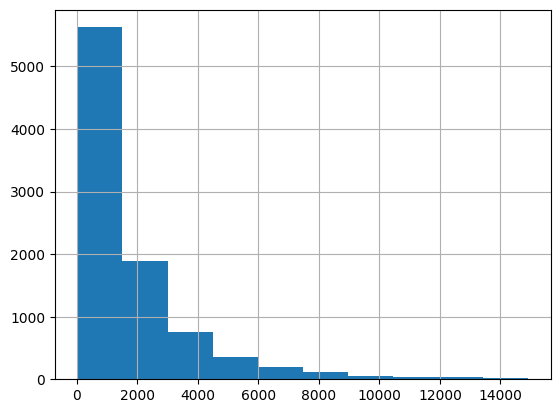

In [184]:
data = data[data.CheckingAccountBalance <= 15000]
data['CheckingAccountBalance'].hist()
data['CheckingAccountBalance'].describe()

#### У TotalAssets

count    9.090000e+03
mean     1.800470e+05
std      4.537730e+05
min      8.920000e+02
25%      2.279425e+04
50%      6.029950e+04
75%      1.599852e+05
max      1.128946e+07
Name: TotalAssets, dtype: float64

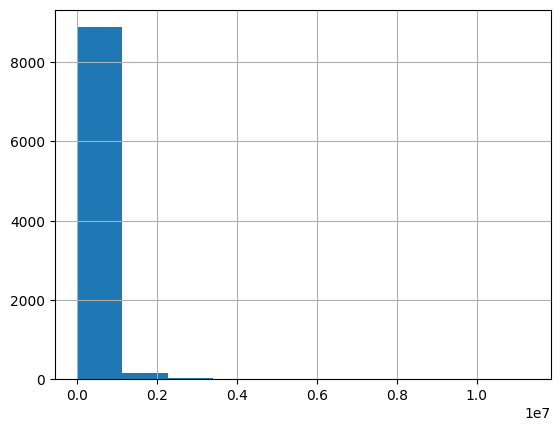

In [185]:
data['TotalAssets'].hist()
data['TotalAssets'].describe()

count    8.904000e+03
mean     1.323198e+05
std      1.918339e+05
min      8.920000e+02
25%      2.236675e+04
50%      5.800650e+04
75%      1.489325e+05
max      1.199792e+06
Name: TotalAssets, dtype: float64

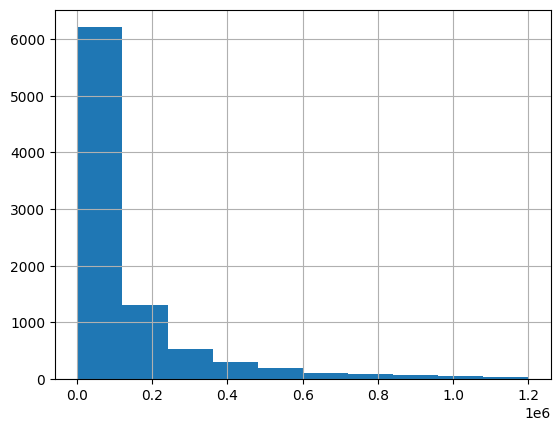

In [186]:
data = data[data.TotalAssets <= 1.2e6]
data['TotalAssets'].hist()
data['TotalAssets'].describe()

#### У TotalLiabilities

count    8.904000e+03
mean     6.911801e+04
std      2.050411e+05
min      7.800000e+01
25%      8.018250e+03
50%      2.268350e+04
75%      6.033550e+04
max      8.997054e+06
Name: TotalLiabilities, dtype: float64

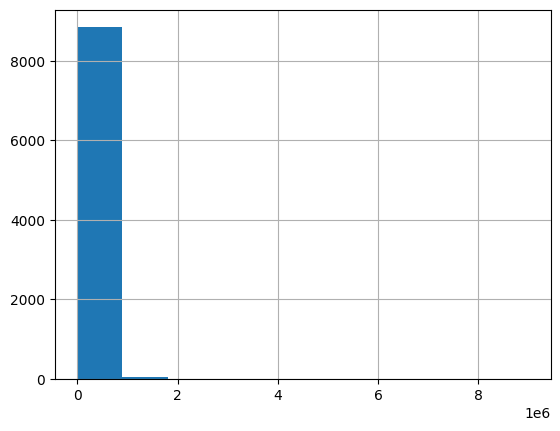

In [187]:
data['TotalLiabilities'].hist()
data['TotalLiabilities'].describe()

count      8763.000000
mean      51929.514664
std       81540.664367
min          78.000000
25%        7871.000000
50%       22141.000000
75%       56633.500000
max      599914.000000
Name: TotalLiabilities, dtype: float64

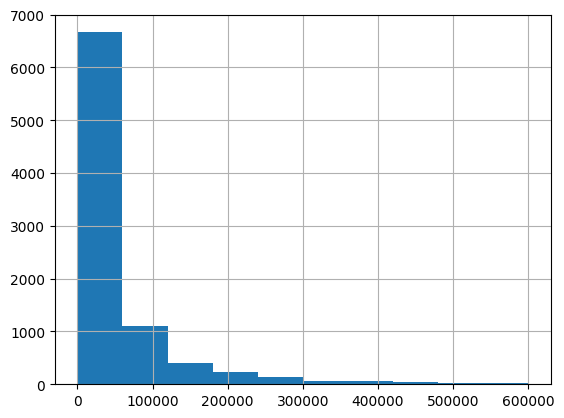

In [188]:
data = data[data.TotalLiabilities <= 0.6e6]
data['TotalLiabilities'].hist()
data['TotalLiabilities'].describe()

#### У NetWorth
`To check later`
<!-- JobTenure -->

count    8.763000e+03
mean     1.055867e+05
std      1.838741e+05
min      1.004000e+03
25%      7.323500e+03
50%      2.644600e+04
75%      1.140570e+05
max      1.194244e+06
Name: NetWorth, dtype: float64

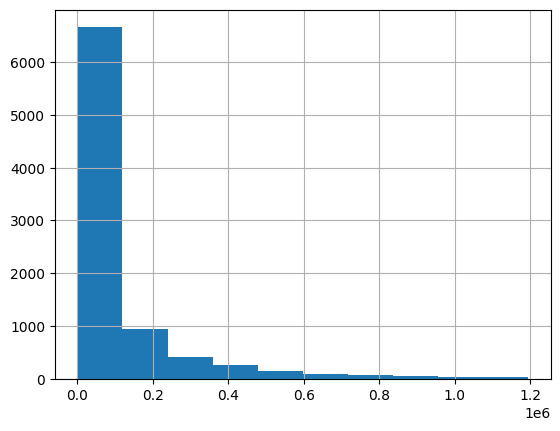

In [189]:
data['NetWorth'].hist()
data['NetWorth'].describe()

count      8707.000000
mean      99268.082233
std      166611.735212
min        1004.000000
25%        7276.500000
50%       26007.000000
75%      110618.000000
max      997849.000000
Name: NetWorth, dtype: float64

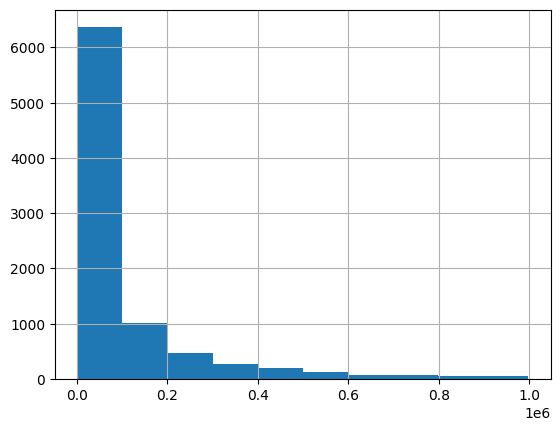

In [190]:
data = data[data.NetWorth <= 1e6]
data['NetWorth'].hist()
data['NetWorth'].describe()

#### У MonthlyLoanPayment

count     8707.000000
mean      1041.076068
std       1147.526488
min         30.008506
25%        374.273694
50%        684.613633
75%       1276.447120
max      16794.048145
Name: MonthlyLoanPayment, dtype: float64

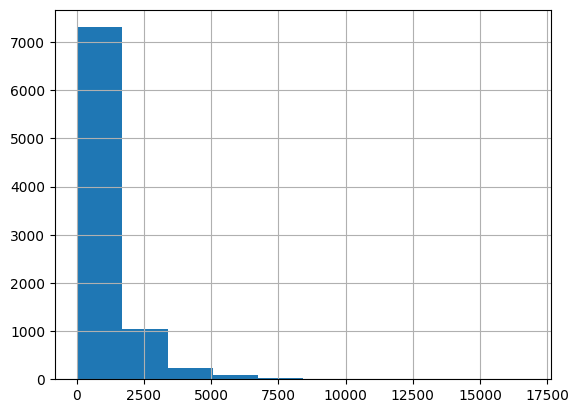

In [191]:
data['MonthlyLoanPayment'].hist()
data['MonthlyLoanPayment'].describe()

count    8661.000000
mean      997.967031
std       970.042073
min        30.008506
25%       372.246815
50%       681.467837
75%      1257.707186
max      6962.162176
Name: MonthlyLoanPayment, dtype: float64

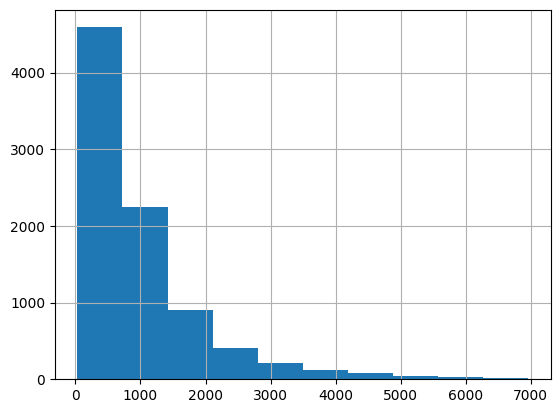

In [192]:
data = data[data.MonthlyLoanPayment <= 7000]
data['MonthlyLoanPayment'].hist()
data['MonthlyLoanPayment'].describe()

#### У TotalDebtToIncomeRatio

count    8661.000000
mean        0.481855
std         0.703763
min         0.006064
25%         0.065414
50%         0.172684
75%         0.623272
max         6.118290
Name: TotalDebtToIncomeRatio, dtype: float64

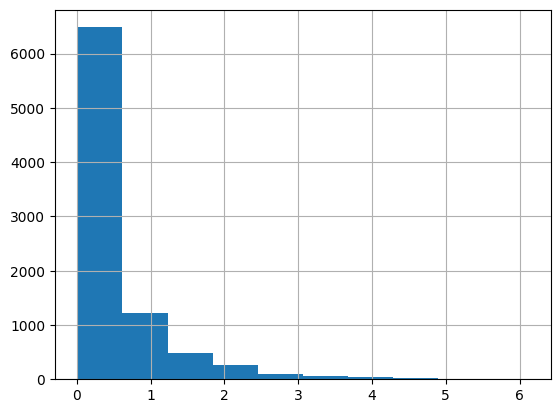

In [193]:
data['TotalDebtToIncomeRatio'].hist()
data['TotalDebtToIncomeRatio'].describe()

count    8527.000000
mean        0.428989
std         0.561304
min         0.006064
25%         0.064610
50%         0.167616
75%         0.586986
max         2.986813
Name: TotalDebtToIncomeRatio, dtype: float64

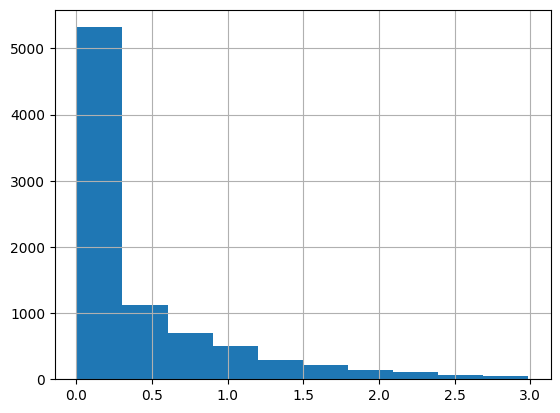

In [194]:
data = data[data.TotalDebtToIncomeRatio <= 3]
data['TotalDebtToIncomeRatio'].hist()
data['TotalDebtToIncomeRatio'].describe()

На этом с выбросами все

### Обработка категориальных признаков

In [195]:
data.select_dtypes(include=['object'])

,ApplicationDate,MaritalStatus,HomeOwnershipStatus,LoanPurpose,EmploymentStatus,EducationLevel
0,2010-06-26,Divorced,Rent,Education,Employed,Associate
1,1996-09-23,Widowed,Mortgage,Home,Employed,High School
2,2015-01-19,Married,Mortgage,Education,Employed,Bachelor
3,1981-05-12,Married,Other,Debt Consolidation,Employed,High School
4,1995-05-07,Single,Rent,Debt Consolidation,Employed,Bachelor
...,...,...,...,...,...,...
9994,1986-11-30,Married,Mortgage,Debt Consolidation,Employed,Doctorate
9995,1995-06-09,Single,Other,Education,Employed,High School
9996,2000-03-10,Married,Mortgage,Auto,Employed,High School
9997,2010-04-05,Divorced,Mortgage,Education,Employed,High School


#### Дата
Ее можно обработать 3 способами:
+ удалить
+ заменить на 3 столбца (день, месяц, год) или оставить только часть
+ заменить на большое число (например, 20241010)

In [196]:
# 1)
# data = data.drop(columns=['ApplicationDate'])

# 2) 
Date_col = data['ApplicationDate'].astype('datetime64[ns]')

date_day = pd.DataFrame({
    'ApplicationDay' : Date_col.dt.day.astype(int),
})
date_month = pd.DataFrame({
    'ApplicationMonth' : Date_col.dt.month.astype(int),
})
date_year = pd.DataFrame({
    'ApplicationYear' : Date_col.dt.year.astype(int),
})

data = data.drop(columns=['ApplicationDate'])

data = pd.concat([date_day, date_month, date_year, data], axis=1)
# data = pd.concat([date_month, date_year, data], axis=1)

# 3)
# Date_col = data['ApplicationDate'].astype('datetime64[ns]')
# data = data.drop(columns=['ApplicationDate'])
# data['ApplicationDate'] = Date_col.dt.day.astype(int) + Date_col.dt.month.astype(int)*100 + Date_col.dt.year.astype(int)*10000

data

,ApplicationDay,ApplicationMonth,ApplicationYear,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,26,6,2010,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,...,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,23,9,1996,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,...,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,19,1,2015,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,...,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,12,5,1981,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,...,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,7,5,1995,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,...,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,30,11,1986,31.0,300000.0,850.0,14503.0,60.0,Married,2.0,...,Employed,Doctorate,10.0,6992.0,0.104503,0.113622,317.956385,0.020118,1.0,34.037970
9995,9,6,1995,27.0,15000.0,361.0,19505.0,36.0,Single,1.0,...,Employed,High School,2.0,31346.0,0.334005,0.346203,878.142786,1.200114,0.0,76.185933
9996,10,3,2000,49.0,185082.0,573.0,7447.0,84.0,Married,0.0,...,Employed,High School,27.0,14016.0,0.255947,0.235055,181.438855,0.073099,1.0,41.213393
9997,5,4,2010,55.0,296728.0,850.0,44162.0,84.0,Divorced,2.0,...,Employed,High School,33.0,3624.0,0.154162,0.144973,839.774585,0.053333,1.0,43.699684


#### One-hot encoding

In [197]:
# data = pd.get_dummies(data, columns=['EmploymentStatus'], drop_first=True)
# data = pd.get_dummies(data, columns=['MaritalStatus'], drop_first=True)
# data = pd.get_dummies(data, columns=['LoanPurpose'], drop_first=True)
# data = pd.get_dummies(data, columns=['EducationLevel'], drop_first=True)
# data = pd.get_dummies(data, columns=['HomeOwnershipStatus'], drop_first=True)

data

,ApplicationDay,ApplicationMonth,ApplicationYear,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,26,6,2010,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,...,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,23,9,1996,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,...,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,19,1,2015,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,...,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,12,5,1981,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,...,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,7,5,1995,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,...,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,30,11,1986,31.0,300000.0,850.0,14503.0,60.0,Married,2.0,...,Employed,Doctorate,10.0,6992.0,0.104503,0.113622,317.956385,0.020118,1.0,34.037970
9995,9,6,1995,27.0,15000.0,361.0,19505.0,36.0,Single,1.0,...,Employed,High School,2.0,31346.0,0.334005,0.346203,878.142786,1.200114,0.0,76.185933
9996,10,3,2000,49.0,185082.0,573.0,7447.0,84.0,Married,0.0,...,Employed,High School,27.0,14016.0,0.255947,0.235055,181.438855,0.073099,1.0,41.213393
9997,5,4,2010,55.0,296728.0,850.0,44162.0,84.0,Divorced,2.0,...,Employed,High School,33.0,3624.0,0.154162,0.144973,839.774585,0.053333,1.0,43.699684


#### Label encoding

In [198]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# data['MaritalStatus'] = le.fit_transform(data['MaritalStatus'])
# data['LoanPurpose'] = le.fit_transform(data['LoanPurpose'])
# data['EducationLevel'] = le.fit_transform(data['EducationLevel'])
# data['HomeOwnershipStatus'] = le.fit_transform(data['HomeOwnershipStatus'])

data

,ApplicationDay,ApplicationMonth,ApplicationYear,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,26,6,2010,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,...,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,23,9,1996,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,...,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,19,1,2015,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,...,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,12,5,1981,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,...,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,7,5,1995,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,...,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,30,11,1986,31.0,300000.0,850.0,14503.0,60.0,Married,2.0,...,Employed,Doctorate,10.0,6992.0,0.104503,0.113622,317.956385,0.020118,1.0,34.037970
9995,9,6,1995,27.0,15000.0,361.0,19505.0,36.0,Single,1.0,...,Employed,High School,2.0,31346.0,0.334005,0.346203,878.142786,1.200114,0.0,76.185933
9996,10,3,2000,49.0,185082.0,573.0,7447.0,84.0,Married,0.0,...,Employed,High School,27.0,14016.0,0.255947,0.235055,181.438855,0.073099,1.0,41.213393
9997,5,4,2010,55.0,296728.0,850.0,44162.0,84.0,Divorced,2.0,...,Employed,High School,33.0,3624.0,0.154162,0.144973,839.774585,0.053333,1.0,43.699684


Но есть еще один вариант - просто удалить

In [199]:
data = data.drop(columns=['MaritalStatus', 'EmploymentStatus', 'LoanPurpose', 'EducationLevel', 'HomeOwnershipStatus'])

### Нормализация
Можно использовать MinMaxScaler и StandadScaler

In [200]:
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
# scaler = MinMaxScaler()

y = data['LoanApproved']
X = data.drop(columns=['LoanApproved'])
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X

,ApplicationDay,ApplicationMonth,ApplicationYear,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
0,1.165804,-0.138564,0.927398,-1.112200,-0.576176,-0.769950,-0.475826,0.263932,-0.401581,1.299583,...,-0.579244,1.003813,-0.430112,-1.206640,-0.384566,0.677483,0.599583,-0.498378,-0.251173,1.048045
1,0.825202,0.730423,-0.256334,1.308022,0.331342,0.969802,-0.529263,-0.729688,-0.401581,-0.728662,...,0.355610,0.104393,-1.335348,1.358891,-0.433100,-1.216483,-1.111198,-0.491890,-0.674192,-1.149659
2,0.371066,-1.586875,1.350159,0.962276,1.433042,0.969802,0.481780,-0.729688,-1.105008,0.039960,...,1.490495,1.065884,-0.882730,0.916558,1.079496,-0.970183,-0.870502,0.364936,-0.635020,-0.800158
3,-0.423672,-0.428226,-1.524618,-1.285073,-0.853176,0.952462,-0.389965,-0.232878,-1.105008,-0.861737,...,-0.864587,0.745440,-0.882730,-1.560507,-0.540067,-1.055681,-0.898839,-0.510276,-0.362703,-0.658859
4,-0.991342,-0.428226,-0.340886,1.308022,1.433042,0.969802,0.119542,-0.232878,0.301846,0.076671,...,1.490495,0.844925,0.022506,1.181958,-0.568480,-0.948108,-1.155895,-0.217470,-0.670386,-0.983356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8522,1.619940,1.309748,-1.101857,-0.766454,1.433042,0.969802,-0.602036,0.263932,0.301846,-0.788316,...,1.490495,0.600808,-0.430112,-0.675840,-0.553497,-1.013572,-0.890187,-0.715556,-0.728474,-0.826412
8523,-0.764274,-0.138564,-0.340886,-1.112200,-1.022783,-1.856572,-0.375519,-0.729688,-0.401581,0.214334,...,-1.039303,0.787172,0.022506,-1.383573,-0.406955,1.518284,1.623494,-0.078637,1.373891,1.631838
8524,-0.650740,-1.007551,0.081875,0.789403,0.442802,-0.631232,-0.921571,1.257552,-1.105008,0.957718,...,0.470427,0.590659,-0.430112,0.828092,-0.511232,0.657152,0.422226,-0.870773,-0.634080,-0.407911
8525,-1.218410,-0.717888,0.927398,1.308022,1.404848,0.969802,0.741085,1.257552,0.301846,-0.113764,...,1.461451,0.306126,-0.430112,1.358891,-0.573763,-0.465736,-0.551359,-0.122261,-0.669297,-0.262900


### Выявление зависимостей

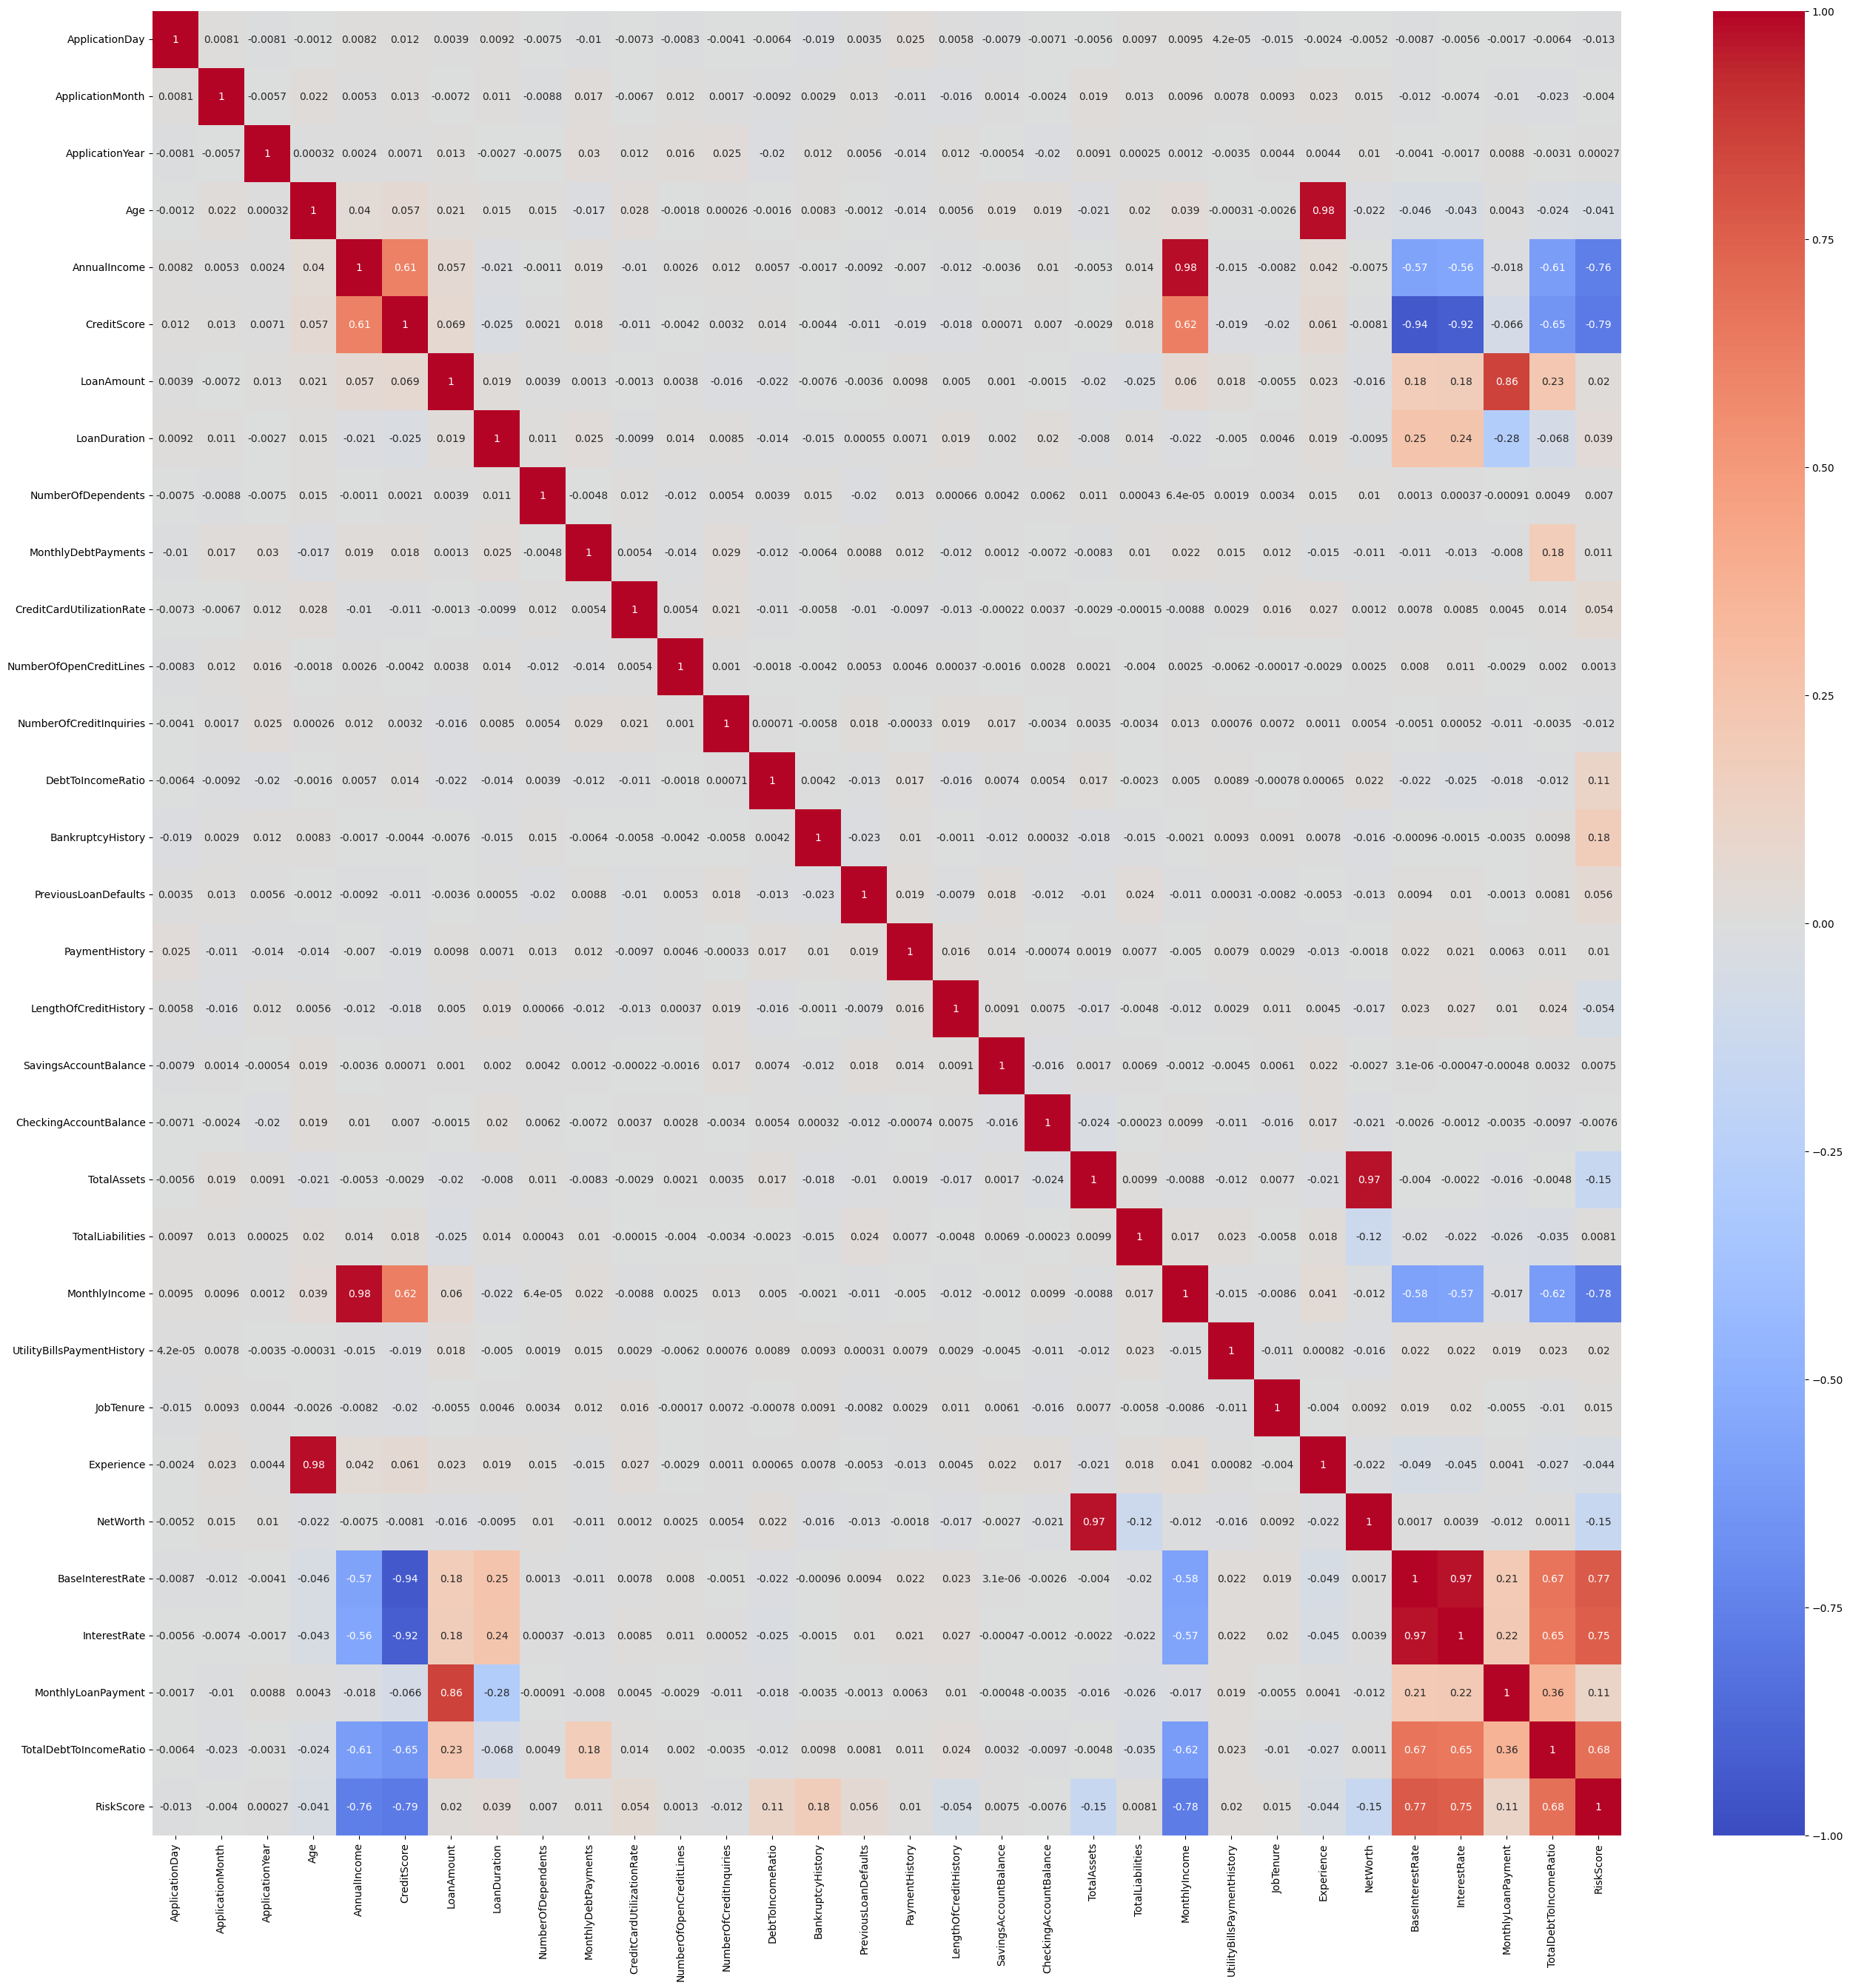

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt
matrix = X.corr()
plt.figure(figsize=(np.shape(X)[1], np.shape(X)[1]))
sns.heatmap(matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

In [202]:
# смотрим на признаки с сильной корреляцией
print(matrix[(abs(matrix) >= 0.7) & (matrix != 1.)].stack())

Age                 Experience            0.982730
AnnualIncome        MonthlyIncome         0.984258
                    RiskScore            -0.763626
CreditScore         BaseInterestRate     -0.943094
                    InterestRate         -0.918890
                    RiskScore            -0.788502
LoanAmount          MonthlyLoanPayment    0.857978
TotalAssets         NetWorth              0.974224
MonthlyIncome       AnnualIncome          0.984258
                    RiskScore            -0.776114
Experience          Age                   0.982730
NetWorth            TotalAssets           0.974224
BaseInterestRate    CreditScore          -0.943094
                    InterestRate          0.974432
                    RiskScore             0.766002
InterestRate        CreditScore          -0.918890
                    BaseInterestRate      0.974432
                    RiskScore             0.750166
MonthlyLoanPayment  LoanAmount            0.857978
RiskScore           AnnualIncom

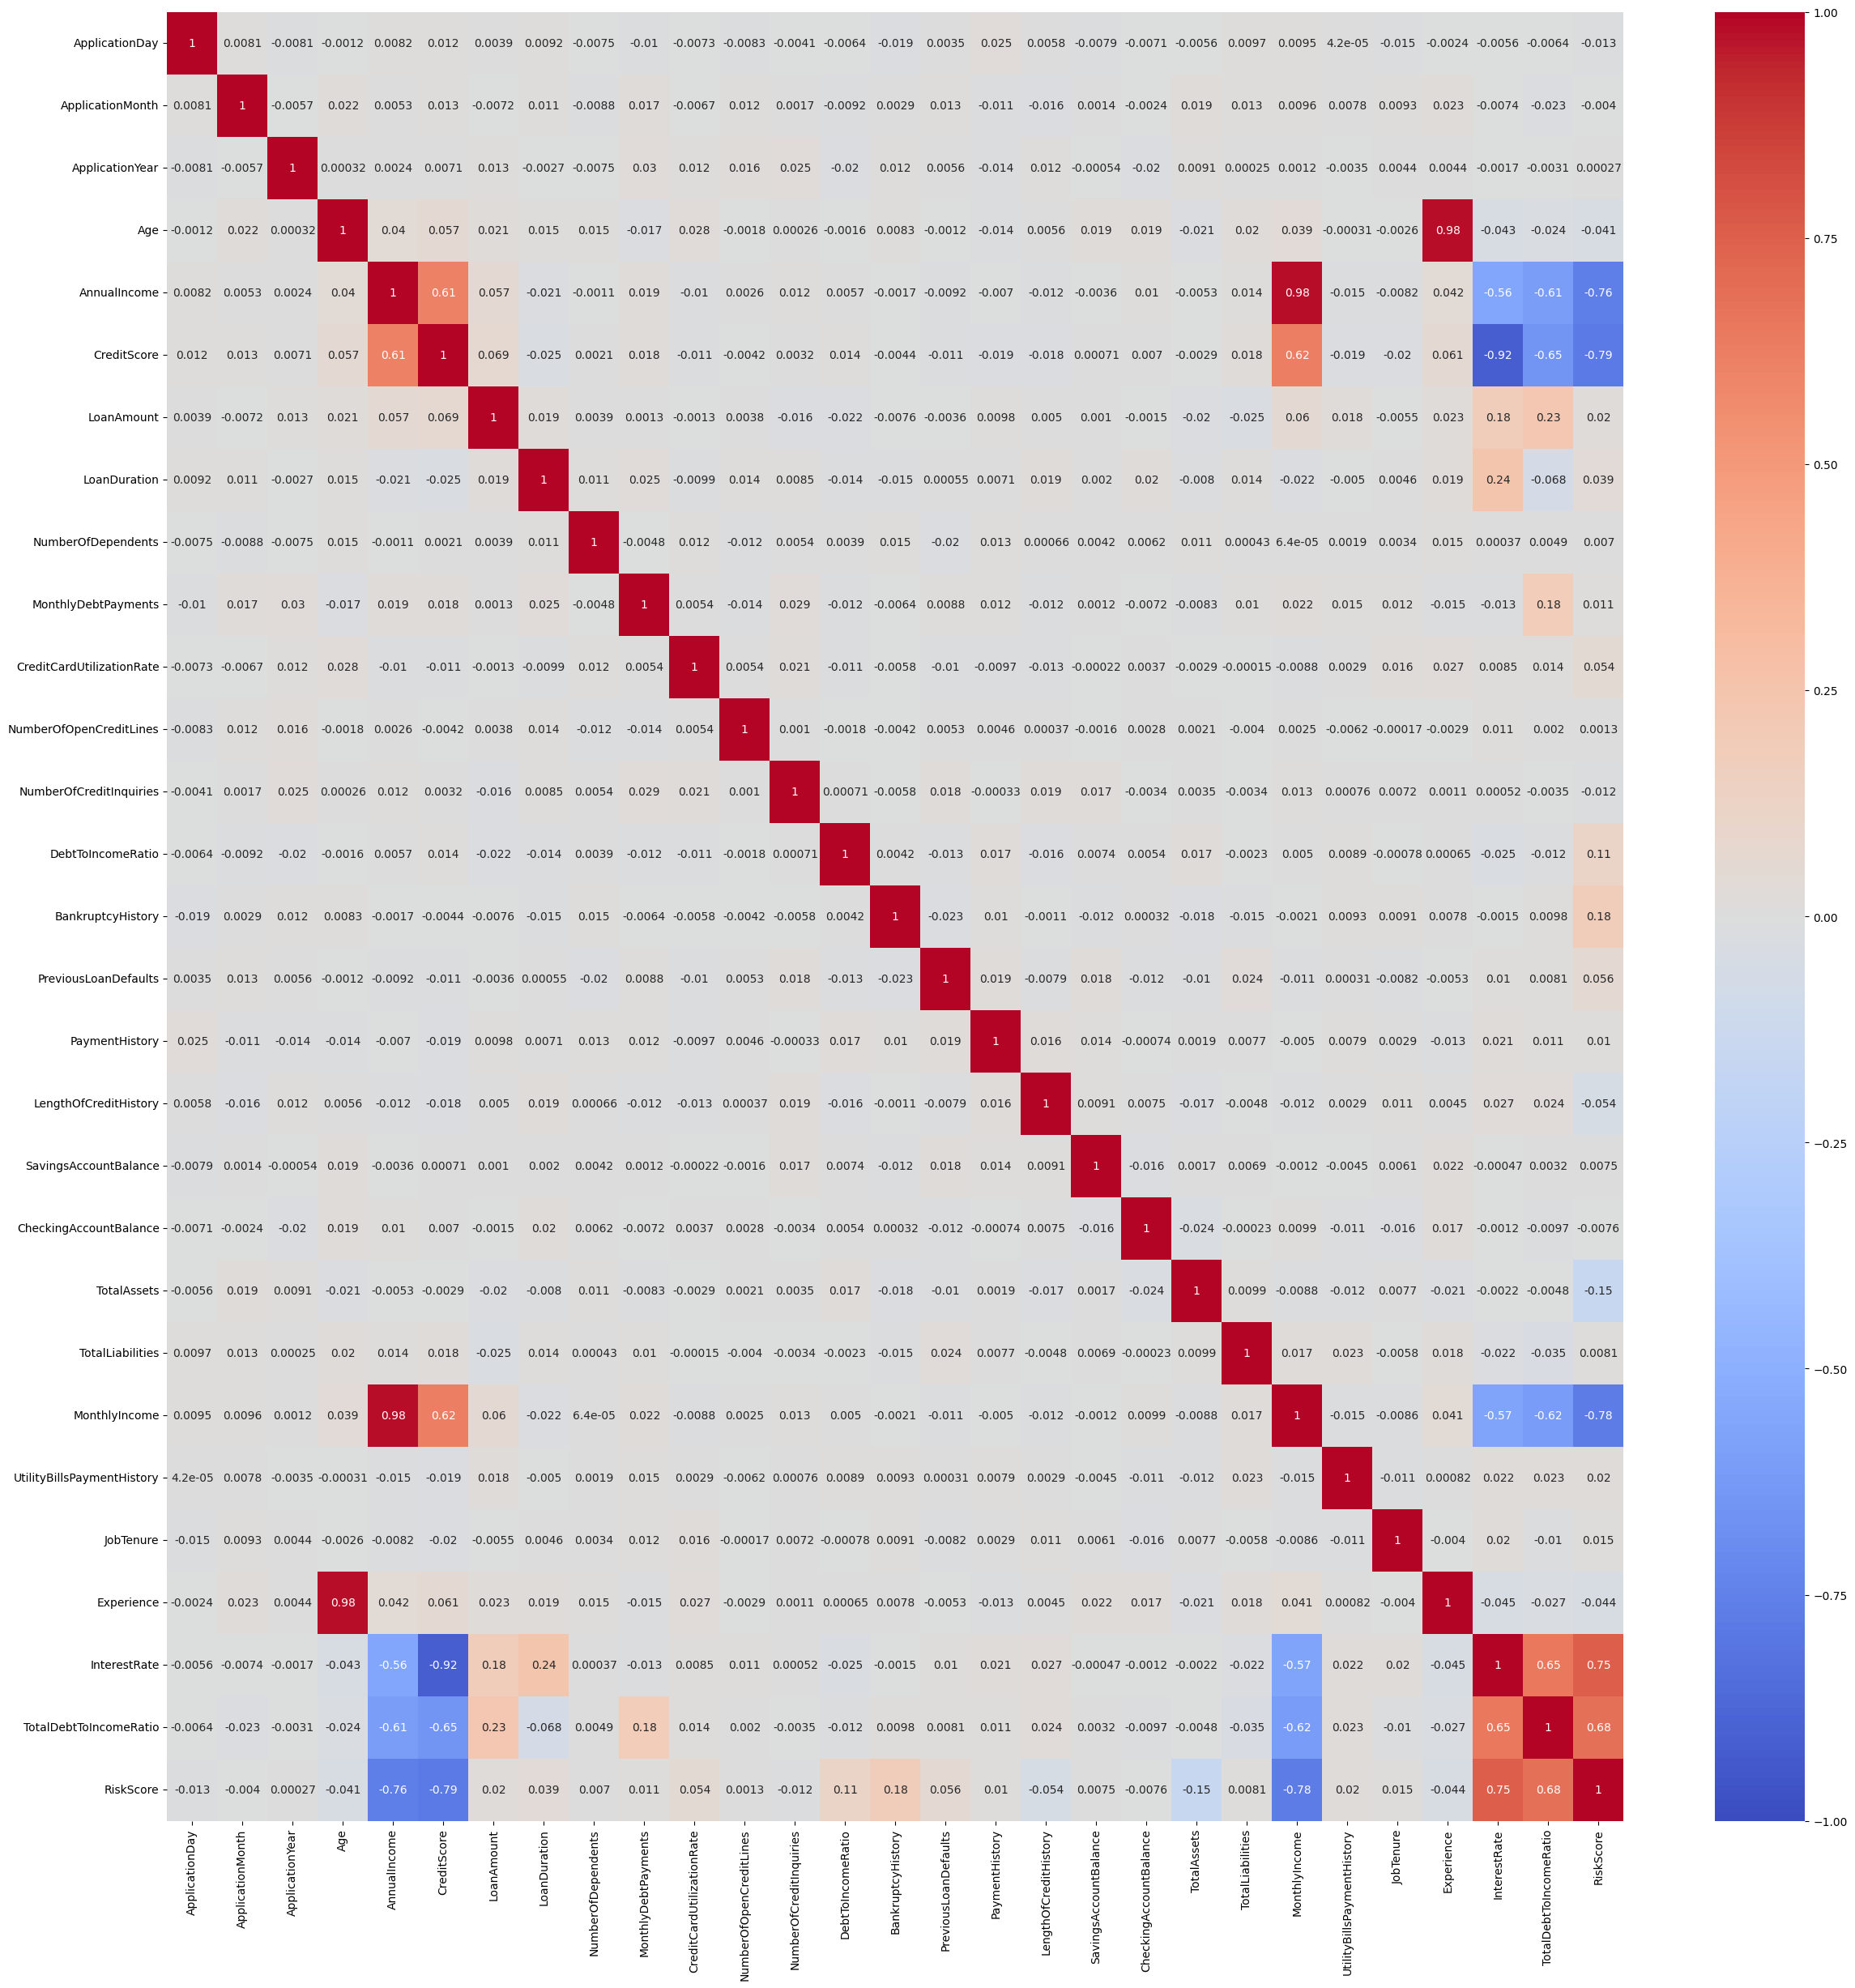

29

In [203]:
# X['Age_Experience'] = X['Age'] * X['Experience']
# X['CreditScore_AnnualIncome'] = X['CreditScore'] * X['AnnualIncome']
# X['RiskScore_InterestRate'] = X['InterestRate'] * X['RiskScore']
# X = X.drop(columns=['InterestRate'])
# X = X.drop(columns=['RiskScore'])
# X = X.drop(columns=['Experience'])
# X = X.drop(columns=['Age'])
# X = X.drop(columns=['CreditScore'])
# X = X.drop(columns=['AnnualIncome'])
# X = X.drop(columns=['MonthlyIncome'])
# X = X.drop(columns=['TotalDebtToIncomeRatio'])
X = X.drop(columns=['NetWorth'])
X = X.drop(columns=['MonthlyLoanPayment'])
X = X.drop(columns=['BaseInterestRate'])

matrix = X.corr()
plt.figure(figsize=(np.shape(X)[1], np.shape(X)[1]))
sns.heatmap(matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

# all features (with encoded ones)
np.shape(X)[1]

## Разделение на выборки

In [204]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
print("Train", np.shape(X_train), np.shape(y_train))
print("Test", np.shape(X_test), np.shape(y_test))

Train (5968, 29) (5968,)
Test (2559, 29) (2559,)


## Обучение моделей

После обучения модели нужно вывести confusion matrix и значения метрик precision, recall, accuracy и F1.

In [205]:
from sklearn.metrics import confusion_matrix, classification_report

### Логистическая регрессия: sklearn

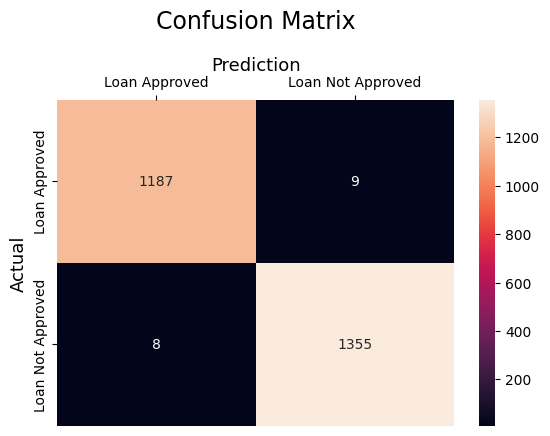

In [206]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, y_train)

y_pred = clf.predict(X_test)

matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, 
            annot=True,
            fmt='g', 
            xticklabels=['Loan Approved','Loan Not Approved'],
            yticklabels=['Loan Approved','Loan Not Approved'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.show()

In [207]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1196
         1.0       0.99      0.99      0.99      1363

    accuracy                           0.99      2559
   macro avg       0.99      0.99      0.99      2559
weighted avg       0.99      0.99      0.99      2559



### SVM: sklearn

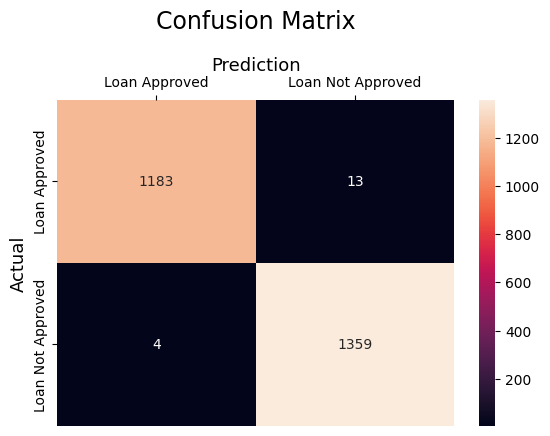

In [208]:
from sklearn.svm import SVC

clf = SVC().fit(X_train, y_train)

y_pred = clf.predict(X_test)

matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, 
            annot=True,
            fmt='g', 
            xticklabels=['Loan Approved','Loan Not Approved'],
            yticklabels=['Loan Approved','Loan Not Approved'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.show()

In [209]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1196
         1.0       0.99      1.00      0.99      1363

    accuracy                           0.99      2559
   macro avg       0.99      0.99      0.99      2559
weighted avg       0.99      0.99      0.99      2559



### Решающее дерево: sklearn

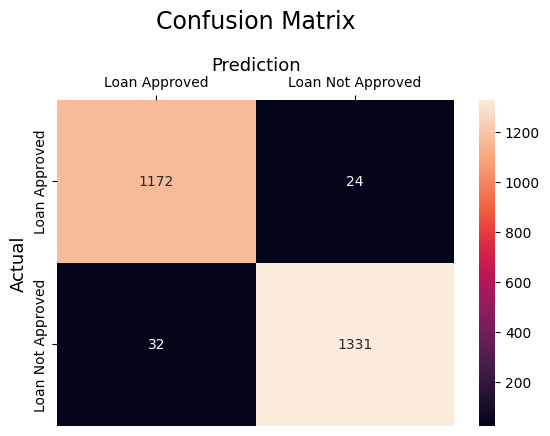

In [210]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)

y_pred = clf.predict(X_test)

matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, 
            annot=True,
            fmt='g', 
            xticklabels=['Loan Approved','Loan Not Approved'],
            yticklabels=['Loan Approved','Loan Not Approved'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.show()

In [211]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      1196
         1.0       0.98      0.98      0.98      1363

    accuracy                           0.98      2559
   macro avg       0.98      0.98      0.98      2559
weighted avg       0.98      0.98      0.98      2559



### Случайный лес: sklearn

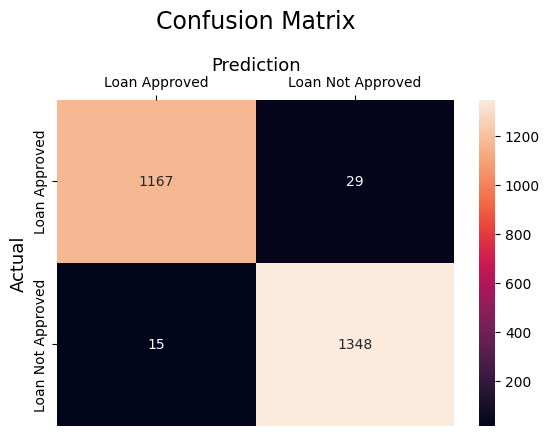

In [212]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier().fit(X_train, y_train)

y_pred = clf.predict(X_test)

matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, 
            annot=True,
            fmt='g', 
            xticklabels=['Loan Approved','Loan Not Approved'],
            yticklabels=['Loan Approved','Loan Not Approved'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.show()

In [213]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      1196
         1.0       0.98      0.99      0.98      1363

    accuracy                           0.98      2559
   macro avg       0.98      0.98      0.98      2559
weighted avg       0.98      0.98      0.98      2559



### Градиентный бустинг

#### sklearn

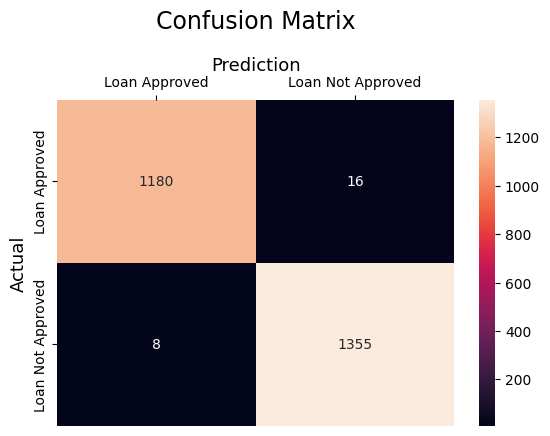

In [214]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier().fit(X_train, y_train)

y_pred = clf.predict(X_test)

matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, 
            annot=True,
            fmt='g', 
            xticklabels=['Loan Approved','Loan Not Approved'],
            yticklabels=['Loan Approved','Loan Not Approved'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.show()

In [215]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1196
         1.0       0.99      0.99      0.99      1363

    accuracy                           0.99      2559
   macro avg       0.99      0.99      0.99      2559
weighted avg       0.99      0.99      0.99      2559



#### LightGBM

[LightGBM] [Info] Number of positive: 3041, number of negative: 2927
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002318 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4139
[LightGBM] [Info] Number of data points in the train set: 5968, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509551 -> initscore=0.038208
[LightGBM] [Info] Start training from score 0.038208


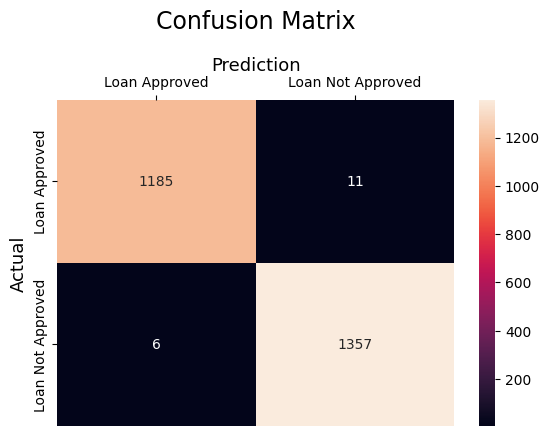

In [216]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier().fit(X_train, y_train)

y_pred = clf.predict(X_test)

matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, 
            annot=True,
            fmt='g', 
            xticklabels=['Loan Approved','Loan Not Approved'],
            yticklabels=['Loan Approved','Loan Not Approved'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.show()

In [217]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1196
         1.0       0.99      1.00      0.99      1363

    accuracy                           0.99      2559
   macro avg       0.99      0.99      0.99      2559
weighted avg       0.99      0.99      0.99      2559



#### XGBoost

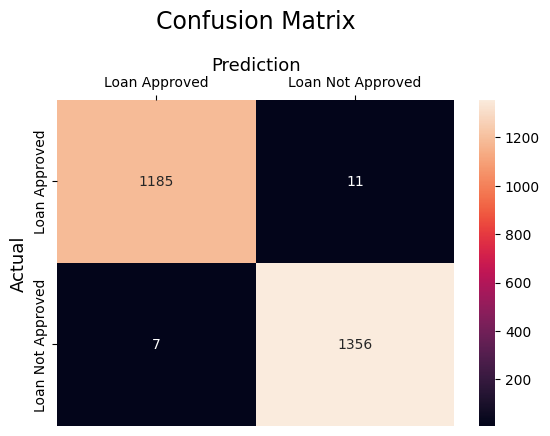

In [218]:
from xgboost import XGBClassifier

clf = XGBClassifier().fit(X_train, y_train)

y_pred = clf.predict(X_test)

matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, 
            annot=True,
            fmt='g', 
            xticklabels=['Loan Approved','Loan Not Approved'],
            yticklabels=['Loan Approved','Loan Not Approved'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.show()

In [219]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1196
         1.0       0.99      0.99      0.99      1363

    accuracy                           0.99      2559
   macro avg       0.99      0.99      0.99      2559
weighted avg       0.99      0.99      0.99      2559



#### CatBoost

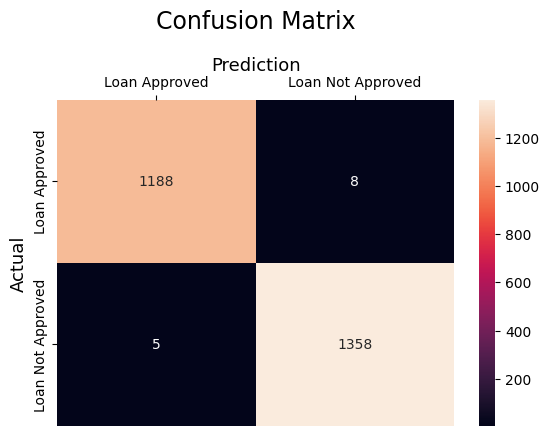

In [220]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(verbose=0).fit(X_train, y_train)

y_pred = clf.predict(X_test)

matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, 
            annot=True,
            fmt='g', 
            xticklabels=['Loan Approved','Loan Not Approved'],
            yticklabels=['Loan Approved','Loan Not Approved'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.show()

In [221]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1196
         1.0       0.99      1.00      1.00      1363

    accuracy                           0.99      2559
   macro avg       0.99      0.99      0.99      2559
weighted avg       0.99      0.99      0.99      2559



### Теперь обучим собственный классификатор

In [222]:
class SelfLinearClassifier:
    def __init__(self):
        self.weights = None
        self.bias = None

    def fit(self, X, y, learning_rate=0.01, n_iterations=1000):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(n_iterations):
            linear_output = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_output)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db
        return self

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_output)
        class_labels = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(class_labels)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))


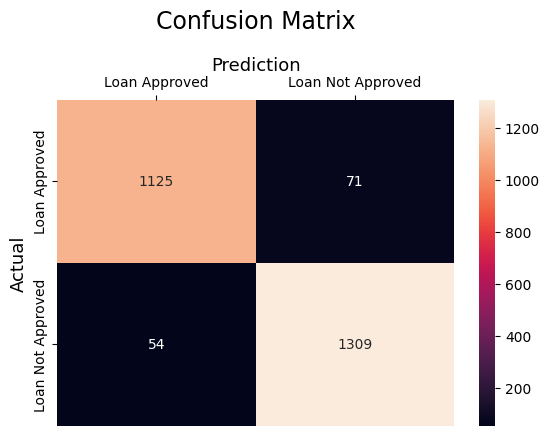

In [223]:
clf = SelfLinearClassifier().fit(X_train, y_train)

y_pred = clf.predict(X_test)

matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, 
            annot=True,
            fmt='g', 
            xticklabels=['Loan Approved','Loan Not Approved'],
            yticklabels=['Loan Approved','Loan Not Approved'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.show()

In [224]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95      1196
         1.0       0.95      0.96      0.95      1363

    accuracy                           0.95      2559
   macro avg       0.95      0.95      0.95      2559
weighted avg       0.95      0.95      0.95      2559



## Выводы

Выполняя данную лабораторную работу, я ознакомился со многими видами классификаторов. 
Рассмотрим матрирцу ошибок, precision, recall, accuracy и F1-меру для CatBoost, так как ее результаты оказались лучшими:

+ Смотря на значения в confusion matrix можно отметить, что ложных предсказаний класса практически не было (FP = 5 и FN = 8, что для всего набора тестовых данных > 2000 можно считать ничтожным)

+ accuracy = 0.99: высокое значение всегда хорошо, но не информативно. Рассмотрим пример: у нас есть класс, который встречается раз в 10 000 записей, в датасете всего 10 000 записей и модель не предсказала наш "малый" класс -> accuracy ~ 1, и так каждый раз мы предсказываем только один класс без критического падения accuracy -> наша модель - константа -> толку от нее?

+ precision_1 = 0.99, precision_0 = 1: значение precision показывает долю правильный предсказаний класса ко всем предсказаниям класса -> из всех предсказаний класса модель попала в >99% случаев

+ recall_1 = 1, recall_0 = 0.99: значение recall показывает долю правильных предсказаний класса к общему количеству данного класса (сколько раз он встретился в реальных данных) 

+ F1-мера_1 = 1, F1-мера_0 = 0.99: комбинация recall и precision, которая показывает баланс между метриками. Выссокое значение дает понять, что модель справляется с задачей классификации с высокой эффективностью

Что касается написанного мной классификатора, то его метрики близки к другим моделям, что является хорошим результатом.

Самой информативной метрикой для валидации классификатора является F-мера, так как она учитывает precision и recall и не зависит от сбалансированности классов (в отличие от accuracy, которая просто смотрит долю правильных предсказаний относительно всех).